In [ ]:
'''Jonathan Zhang + Keshan Chen'''

#  Checkpoint #2 Report:

Problem to investigate:
    - "What parameters can help with battery health related issues?"

Based on the data/samples collected from the Battery DLL file, we found some parameters 
that we believe can influence battery health substantially. 

- ACPI-BATTERY(1) - # of batteries detected 
- ACPI-BATTERY(2) - Battery life %
- ACPI-BATTERY(6) - Chemistry
- ACPI-BATTERY(7) - Estimated runtime (s)
- ACPI-BATTERY(8) - Charge discharge rate
- ACPI-BATTERY(10) - Full charge capacity

In our subject domain, we utilize Intel's SDK (software development kit) for data collection. In doing so, we use their input libraries to extrapolate data from our computer's user wait time, processes, device and battery usage, specifically BATTERY and DEVICE USE.

In order to generate the data we needed to accomplish the tasks at hand, specifically performing data analysis on Battery and Device Use, we needed to use Intel's ESRV process which essentially gave us all the data we needed from our own computers. The output database file contained the timestamp at which the battery life was at a certain percentage, along with other various statistics and characteristics of our battery. We believe that in analyzing the parameters above, we can substantiate findings to see whether or not we can prolong battery life.


# Checkpoint #1 Code for BATTERY:


#  Imports

In [1]:
import numpy as np
import pandas as pd

# Data Preparation

In [2]:
# Data for BATTERY
data = pd.read_csv("../data/temp/counters_ull_time_data.csv")

# COUNTERS_ULL_TIME_DATA.csv   --  Data Analysis

Data that we choose :

        - AC Status(0): 0 if the power is offline; 1 if the power is online; 255 if the status is unknown
        
        - Battery Life Percentage(1): The percentage of fully battery charge remaining(from 0 to 100, or 255 if status is unknown)
        
        - System Status Flag(2): 0 if the battery saver is off; 1 if the battery saver is on
        
        - Battery Life Time(3): Number of seconds of battery life remaining; or -1 if full battery lifetime is unknown or the device is connected to AC power
        
        [The descriptions above are from https://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_statushttps://docs.microsoft.com/en-us/windows/win32/api/winbase/ns-winbase-system_power_status]
        

Reasonings : 
        - We are primarily choosing to focus on these 4 parameters because we believe the answer to our problem, "what parameters can help with battery health related issues," lies within a relationship between one of these parameters. 
        - Also, by including the AC Status, we can analyze changes of Battery Life Percentage while the computer is charging as well as the computer power is offline. We'll import some figures representing the changes in the following part. 


In [3]:
# Data Demographic

data['ID_INPUT'].value_counts()

3    5157
2    5157
1    5157
0    5157
Name: ID_INPUT, dtype: int64

In [4]:
data.head()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2020-11-21 00:49:47.838,0,1,0
1,2020-11-21 00:49:47.838,1,94,0
2,2020-11-21 00:49:47.838,2,0,0
3,2020-11-21 00:49:47.838,3,4294967295,0
4,2020-11-21 00:49:48.838,0,1,0


In [16]:
time = data['MEASUREMENT_TIME'].unique()

In [17]:
time

array(['2020-11-21 00:49:47.838', '2020-11-21 00:49:48.838',
       '2020-11-21 00:49:49.838', ..., '2020-11-21 02:17:49.715',
       '2020-11-21 02:17:50.715', '2020-11-21 02:17:51.714'], dtype=object)

#### Organizing dataset

    Since the data that we collect includes all values in the same column, to make it more clear to see, we choose to separate the values based on the ID_input and put them in a same row if the measurement_time is the same. Also since we don't need the measurement time for our analysis, the new dataset does not include the measurement time column. 

In [39]:
ac_status = data.loc[(data['ID_INPUT'] == 0)].reset_index()
battery_life = data.loc[(data['ID_INPUT'] == 1)].reset_index()
battery_saver = data.loc[(data['ID_INPUT'] == 2)].reset_index()
battery_time = data.loc[(data['ID_INPUT'] == 3)].reset_index()

In [46]:
d = {'AC': ac_status['VALUE'], 'Battery_life(%)': battery_life['VALUE'],
    'Battery_saver': battery_saver['VALUE'], 'Battery_time(seconds)': battery_time['VALUE']}
new_data = pd.DataFrame(data = d)
new_data.head()

,AC,Battery_life(%),Battery_saver,Battery_time(seconds)
0,1,94,0,4294967295
1,1,94,0,4294967295
2,1,94,0,4294967295
3,1,94,0,4294967295
4,1,94,0,4294967295


#### For more clear to see the change of battery_life value, we would use line chart and set the x-axis as time and y-axis as the value of battery_life

In [48]:
import matplotlib.pyplot as plt

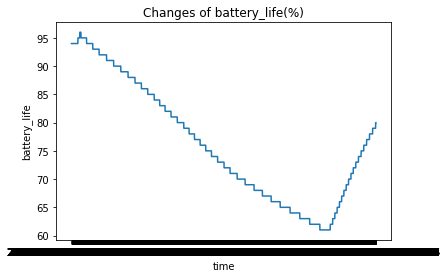

In [49]:
x = battery_life['MEASUREMENT_TIME']
y = battery_life['VALUE']
plt.plot(x,y)
plt.title('Changes of battery_life(%)')
plt.xlabel('time')
plt.ylabel('battery_life')
plt.show()

As we can see from the 

In [9]:
# Max value when ID_INPUT is 2
data.loc[(data['ID_INPUT'] == 2)].max()

MEASUREMENT_TIME    2020-11-07 01:44:36.204
ID_INPUT                                  2
VALUE                                    63
PRIVATE_DATA                              0
dtype: object

In [10]:
# Min value when ID_INPUT is 2
data.loc[(data['ID_INPUT'] == 2)].min()

MEASUREMENT_TIME    2020-11-07 00:51:22.229
ID_INPUT                                  2
VALUE                                    26
PRIVATE_DATA                              0
dtype: object

In [11]:
# Average Battery Life % is 44.5%
data.loc[(data['ID_INPUT'] == 2)].mean()

ID_INPUT         2.0
VALUE           44.5
PRIVATE_DATA     0.0
dtype: float64

#### Conclusion: As we can see from above dataset and line chart, the battery_life keeps decreasing for the whole collecting process. From the beginning, the battery_life is 63 which is the max value and then in the end, the battery_life decreased to 26 which is the min value. 

# COUNTERS_DOUBLE.csv   --  Data Analysis# 

### Now we are using counters_double dataset which contains charge_discharge_rate and system_power_in_dc. First we would analysis the charge_discharge_rate to see the changes of this parameter. 

In [12]:
# Data Demographic
    # 7 : CHARGE_DISCHARGE_RATE
    # 10 : SYSTEM_POWER_IN_DC:WATTS:
data_2['ID_INPUT'].value_counts()

7     1388
10     541
Name: ID_INPUT, dtype: int64

In [13]:
# All the "VALUE(s)" presented when ID_INPUT is 7.
charge_discharge = data_2.loc[(data_2['ID_INPUT'] == 7)]
charge_discharge.head()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2020-11-07 00:51:22.229,7,-19725.0,1
1,2020-11-07 00:51:23.228,7,-19319.0,1
2,2020-11-07 00:51:25.226,7,-19813.0,1
3,2020-11-07 00:51:26.225,7,-19846.0,1
4,2020-11-07 00:51:27.225,7,-19807.0,1


### We would also use the line chart to see the change of values

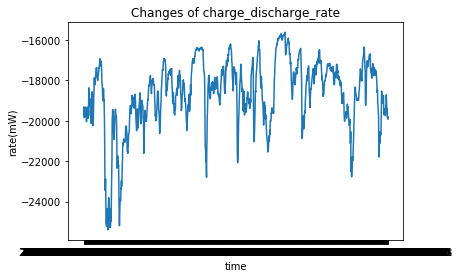

In [14]:
x = charge_discharge['MEASUREMENT_TIME']
y = charge_discharge['VALUE']
plt.plot(x,y)
plt.title('Changes of charge_discharge_rate')
plt.xlabel('time')
plt.ylabel('rate(mW)')
plt.show()

#### Conslusion: We think that since we didn't charge the laptop when collecting the data, the charge_discharge_rate would be negative. Also since we opened and closed several applications during the measurement time, the value of charge_discharge_rate changes inrregularly. 

### Then, we use the system_power_in_dc to see what are the values for this part if we didn't charge our laptop when collecting the data

In [15]:
# All the "VALUE(s)" presented when ID_INPUT is 10.
system_power = data_2.loc[(data_2['ID_INPUT'] == 10)]
system_power.head()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
5,2020-11-07 00:51:28.225,10,0.0,0
9,2020-11-07 00:51:34.223,10,0.0,0
13,2020-11-07 00:51:41.221,10,0.0,0
16,2020-11-07 00:51:46.217,10,0.0,0
21,2020-11-07 00:51:53.217,10,0.0,0


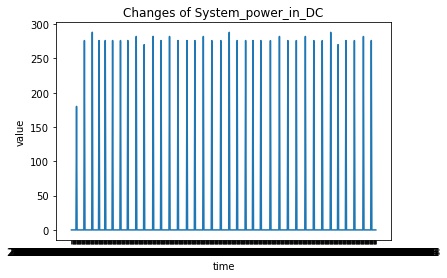

In [16]:
x = system_power['MEASUREMENT_TIME']
y = system_power['VALUE']
plt.plot(x,y)
plt.title('Changes of System_power_in_DC')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

#### Conclusion: As we can see from the above chart, the system_power_in_dc has changed between 0 and over a hundred ...

In [17]:
# Max value when ID_INPUT is 7
    # Max value : -15621
data_2.loc[(data_2['ID_INPUT'] == 7)].max()

MEASUREMENT_TIME    2020-11-07 01:45:30.191
ID_INPUT                                  7
VALUE                                -15621
PRIVATE_DATA                              1
dtype: object

In [18]:
# Min value when ID_INPUT is 7
    # Min value : -25405
data_2.loc[(data_2['ID_INPUT'] == 7)].min()

MEASUREMENT_TIME    2020-11-07 00:51:22.229
ID_INPUT                                  7
VALUE                                -25405
PRIVATE_DATA                              1
dtype: object

In [19]:
# Max value when ID_INPUT is 10
    # Max value : 288.185
data_2.loc[(data_2['ID_INPUT'] == 10)].max()

MEASUREMENT_TIME    2020-11-07 01:45:28.193
ID_INPUT                                 10
VALUE                               288.185
PRIVATE_DATA                              0
dtype: object

In [20]:
# Min value when ID_INPUT is 10
    # Min value : 0
data_2.loc[(data_2['ID_INPUT'] == 10)].min()

MEASUREMENT_TIME    2020-11-07 00:51:28.225
ID_INPUT                                 10
VALUE                                     0
PRIVATE_DATA                              0
dtype: object

# Checkpoint #1 Code for DEVICE USE:


In [21]:
# Real Numbers for VALUES
du_data.head(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2020-11-07 01:50:13.775,3,4,1
1,2020-11-07 01:50:13.775,3,4,2
2,2020-11-07 01:50:13.775,3,4,3
3,2020-11-07 01:50:13.775,3,4,4
4,2020-11-07 01:50:13.775,3,4,5
5,2020-11-07 01:50:13.775,3,4,6
6,2020-11-07 01:50:13.775,3,4,7
7,2020-11-07 01:50:13.775,3,4,8
8,2020-11-07 01:50:13.775,3,4,9
9,2020-11-07 01:50:13.775,3,4,10


In [22]:
# Strings for VALUES
du_data_2.head(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2020-11-07 01:50:13.775,0,GUID_DEVINTERFACE_DISPLAY_ADAPTER,1
1,2020-11-07 01:50:13.775,1,ROOT\BasicDisplay,1
2,2020-11-07 01:50:13.775,2,Microsoft Basic Display Driver,1
3,2020-11-07 01:50:13.775,0,GUID_DEVINTERFACE_DISPLAY_ADAPTER,2
4,2020-11-07 01:50:13.775,1,PCI\VEN_8086&DEV_8A52&SUBSYS_385217AA&REV_07,2
5,2020-11-07 01:50:13.775,2,Intel(R) Iris(R) Plus Graphics,2
6,2020-11-07 01:50:13.775,0,GUID_DEVINTERFACE_MONITOR,3
7,2020-11-07 01:50:13.775,1,MONITOR\BOE06F2,3
8,2020-11-07 01:50:13.775,2,Generic PnP Monitor,3
9,2020-11-07 01:50:13.775,0,GUID_DISPLAY_DEVICE_ARRIVAL,4


In [23]:
# Device Use Data Demographic
    # 3 : Device Status
du_data["ID_INPUT"].value_counts()

3    39
Name: ID_INPUT, dtype: int64

In [24]:
# Device Use Data Demographic
    # 0 : Device Guide
    # 1 : Device HW Name
    # 2 : Device Friendly Name
du_data_2['ID_INPUT'].value_counts()

2    39
1    39
0    39
Name: ID_INPUT, dtype: int64